# Exploring and unifying NAICS codes in the OSHA data
### Author: Jeff Minucci
### Date: 9/9/2019

In [1]:
%matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import datetime
from tabulate import tabulate
from numba import jit
%matplotlib inline
from functions_utils.naics_convert import naics_to_2017

Using matplotlib backend: Qt5Agg


In [2]:
if not '../data/osha/osha_normalized.csv':
    with zipfile.ZipFile('../data/osha/osha_normalized.zip','r') as zfile:
        zfile.extractall('../data/osha')
osha = pd.read_csv('../data/osha/osha_normalized.csv', dtype={'naics_code':str, 'sic_code':str},
                  na_values = ["", " ","NaN", "nan", "NA", "na", "Na"])
osha = osha[osha.columns[1:]]
#osha['naics_code'] = osha['naics_code'].astype(int, errors = 'ignore')
#osha['sic_code'] = osha['sic_code'].astype(int, errors = 'ignore')

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,8,12,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
osha.head(5)

,inspection_number,establishment_name,city,state,zip_code,sic_code,naics_code,sampling_number,office_id,date_sampled,...,sample_weight,imis_substance_code,substance,sample_result,unit_of_measurement,qualifier,input,average_mass,preferred_name,conc_mgm3
0,111211,CONTROLLED CASTINGS CORP,Plainview,NY,11803.0,3365,0,5.24554e+06,214700.0,1984/05/07 00:00:00,...,NaN,T100,Thorium,0.0005,M,NaN,Thorium,232.0377,Thorium,0.0005
1,111211,CONTROLLED CASTINGS CORP,Plainview,NY,11803.0,3365,0,5.2455e+06,214700.0,1984/05/07 00:00:00,...,NaN,T100,Thorium,0.0160,M,NaN,Thorium,232.0377,Thorium,0.0160
2,111252,MID ISLAND NON FERROUS FOUNDRY,East Farmingdale,NY,11735.0,3365,0,5.24534e+06,214700.0,1984/04/04 00:00:00,...,0.0,1591,"Lead, Inorganic (as Pb)",0.0640,M,NaN,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0640
3,114645,TRILECTRON INDUSTRIES INC,Hawthorne,NJ,7506.0,3612,0,5.26995e+06,214500.0,1984/04/16 00:00:00,...,NaN,1591,"Lead, Inorganic (as Pb)",0.0000,M,ND,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0000
4,121590,ALPHA METALS INC,Jersey City,NJ,7304.0,3356,0,5.25176e+06,214200.0,1984/08/16 00:00:00,...,NaN,1591,"Lead, Inorganic (as Pb)",0.0000,M,ND,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0000


### Examining the NAICS codes reported in the osha data

#### How many workplaces have naics codes associated with them?

In [4]:
wp_naics = osha[['establishment_name', 'naics_code']].groupby(['establishment_name']).max()
percent_reported = len(wp_naics[wp_naics['naics_code'].astype(float)>1]) / len(wp_naics) * 100
print("Percent of workplaces with a naics code reported: {0:.0f}%".format(percent_reported))

Percent of workplaces with a naics code reported: 43%


In [5]:
osha['year'] = pd.DatetimeIndex(osha['date_sampled']).year

In [6]:
wp_naics_yr = osha[['establishment_name', 'naics_code','year']].groupby(['establishment_name', 'year']).max().reset_index()
print("Percent of workplaces with naics code reported by year:")
for yr in range(wp_naics_yr['year'].min(), wp_naics_yr['year'].max()+1):
    percent_reported = len(wp_naics_yr[(wp_naics_yr['year'] == yr) & (wp_naics_yr[0]>1)])\
    / len(wp_naics_yr[wp_naics_yr['year'] == yr]) * 100
    print("{0}: {1:.0f}%".format(yr,percent_reported))

Percent of workplaces with naics code reported by year:
1984: 0%
1985: 0%
1986: 0%
1987: 0%
1988: 0%
1989: 0%
1990: 0%
1991: 1%
1992: 0%
1993: 0%
1994: 0%
1995: 0%
1996: 0%
1997: 1%
1998: 1%
1999: 1%
2000: 1%
2001: 2%
2002: 22%
2003: 98%
2004: 100%
2005: 100%
2006: 100%
2007: 100%
2008: 100%
2009: 100%
2010: 100%
2011: 100%
2012: 100%
2013: 100%
2014: 100%
2015: 100%
2016: 91%
2017: 100%
2018: 100%


#### How many workplaces have the older sic codes?

In [7]:
wp_sic = osha[['establishment_name', 'sic_code']].groupby(['establishment_name']).max()
percent_reported = len(wp_sic[wp_sic['sic_code'].astype(float)>1]) / len(wp_sic) * 100
print("Percent of workplaces with an sic code reported: {0:.0f}%".format(percent_reported))

Percent of workplaces with an sic code reported: 82%


In [8]:
wp_sic_yr = osha[['establishment_name','sic_code','year']].groupby(['establishment_name', 'year']).max().reset_index()
print("Percent of workplaces with sic code reported by year:")
for yr in range(wp_sic_yr['year'].min(), wp_sic_yr['year'].max()+1):
    percent_reported = len(wp_sic_yr[(wp_sic_yr['year'] == yr) & (wp_sic_yr[0]>1)])\
    / len(wp_sic_yr[wp_sic_yr['year'] == yr]) * 100
    print("{0}: {1:.0f}%".format(yr,percent_reported))

Percent of workplaces with sic code reported by year:
1984: 100%
1985: 100%
1986: 100%
1987: 100%
1988: 100%
1989: 100%
1990: 100%
1991: 100%
1992: 100%
1993: 100%
1994: 100%
1995: 100%
1996: 100%
1997: 100%
1998: 100%
1999: 100%
2000: 100%
2001: 100%
2002: 100%
2003: 100%
2004: 100%
2005: 100%
2006: 100%
2007: 100%
2008: 100%
2009: 100%
2010: 100%
2011: 82%
2012: 24%
2013: 4%
2014: 3%
2015: 1%
2016: 9%
2017: 0%
2018: 0%


#### What format are the naics codes in? 
Options: 2002, 2007, 2012, 2017 <br>
2007 was the last major version, there are only a handful of changes in 2012 and 2017

In [9]:
wp_naics_yr[wp_naics_yr['year']==2003].head()

,establishment_name,year,level_2,0
10,"104 WEST 40TH STREET PARTNERS, LLC",2003,naics_code,561210.0
12,"110 GULF ASSOCIATES,",2003,naics_code,531120.0
28,"18TH CENTURY HARDWARE COMPANY, INC.",2003,naics_code,331528.0
39,21ST CENTURY PREPARATORY SCHOOL,2003,naics_code,611110.0
55,3-D'S BRIDGE PAINTING CORP.,2003,naics_code,237310.0


2003 data appears to be in 2007 or 2002 format. 331528 no longer exists in naics 2012 or 2017

In [10]:
wp_naics_yr[wp_naics_yr[0]==211130].head()

,establishment_name,year,level_2,0


No data appears to be in 2017 naics format

#### Convert sic codes to naics codes when naics codes aren't available

Many sic codes map to more than one possible naics code

In [11]:
sic_naics_2002 = pd.read_csv('../data/naics/1987_SIC_to_2002_NAICS.csv', 
                            dtype={'SIC': str, '2002 NAICS': str},
                             na_values = ["", " ", "0", "AUX", "Aux", "NaN", "nan"])

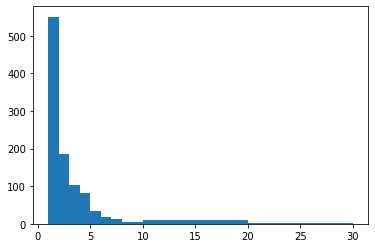

In [12]:
code_counts = sic_naics_2002.SIC.value_counts()
code_counts.hist(grid=False,bins = [1,2,3,4,5,6,7,8,9,10,20,30] )
plt.show()

We will use a version of the sic-to-naics dataset that has these relationships wildcarded.<br>
For example, if 133 maps to either 111930 or 111991, it will be converted to 1119**

In [4]:
sic_naics_2002 = pd.read_csv('../data/naics/1987_SIC_to_2002_NAICS_one_to_one.csv', 
                            dtype={'SIC': str, '2002 NAICS': str},
                             na_values = ["", " ", "0", "AUX", "Aux", "NaN", "nan"])
naics_missing = np.where(osha['naics_code'].astype(float) > 1000,0,1)
sic = osha['sic_code'].astype(int, errors='ignore').astype(str)
naics_from_sic = pd.DataFrame(sic).merge(sic_naics_2002[['SIC', '2002 NAICS']].dropna(), left_on='sic_code',
                         right_on='SIC', how='left')
len(naics_from_sic), len(osha)

(1265341, 1265341)

In [5]:
osha['naics_from_sic'] = np.where(naics_missing, naics_from_sic['2002 NAICS'], osha['naics_code'])

### Convert to naics 2017

In [6]:
to_2017 = pd.Series(naics_to_2017(osha['naics_from_sic']))

In [7]:
osha['naics_unified'] = to_2017

### Assign sector names and make data file

In [8]:
from functions_utils.naics_definitions import industries, get_naics_subcode, get_naics_industry, get_naics_definition
osha['sector'] = osha['naics_unified'].apply(lambda x: get_naics_subcode(x,digits=2) if not pd.isnull(x) else x)
osha['sector_name'] = [get_naics_definition(x,2) for x in osha['naics_unified']]
osha['subsector_name'] = [get_naics_definition(x,3)  for x in osha['naics_unified']]
osha['industry_group_name'] = [get_naics_definition(x,4)  for x in osha['naics_unified']]

In [9]:
osha.head(10)

,inspection_number,establishment_name,city,state,zip_code,sic_code,naics_code,sampling_number,office_id,date_sampled,...,input,average_mass,preferred_name,conc_mgm3,naics_from_sic,naics_unified,sector,sector_name,subsector_name,industry_group_name
0,111211,CONTROLLED CASTINGS CORP,Plainview,NY,11803.0,3365,0,5.24554e+06,214700.0,1984/05/07 00:00:00,...,Thorium,232.0377,Thorium,0.0005,331524,331524,33,Manufacturing,Primary Metal Manufacturing,Foundries
1,111211,CONTROLLED CASTINGS CORP,Plainview,NY,11803.0,3365,0,5.2455e+06,214700.0,1984/05/07 00:00:00,...,Thorium,232.0377,Thorium,0.0160,331524,331524,33,Manufacturing,Primary Metal Manufacturing,Foundries
2,111252,MID ISLAND NON FERROUS FOUNDRY,East Farmingdale,NY,11735.0,3365,0,5.24534e+06,214700.0,1984/04/04 00:00:00,...,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0640,331524,331524,33,Manufacturing,Primary Metal Manufacturing,Foundries
3,114645,TRILECTRON INDUSTRIES INC,Hawthorne,NJ,7506.0,3612,0,5.26995e+06,214500.0,1984/04/16 00:00:00,...,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0000,335311,335311,33,Manufacturing,"Electrical Equipment, Appliance, and Component...",Electrical Equipment Manufacturing
4,121590,ALPHA METALS INC,Jersey City,NJ,7304.0,3356,0,5.25176e+06,214200.0,1984/08/16 00:00:00,...,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0000,331491,331491,33,Manufacturing,Primary Metal Manufacturing,Nonferrous Metal (except Aluminum) Production ...
5,121590,ALPHA METALS INC,Jersey City,NJ,7304.0,3356,0,5.25176e+06,214200.0,1984/08/16 00:00:00,...,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0000,331491,331491,33,Manufacturing,Primary Metal Manufacturing,Nonferrous Metal (except Aluminum) Production ...
6,121590,ALPHA METALS INC,Jersey City,NJ,7304.0,3356,0,5.25171e+06,214200.0,1984/05/03 00:00:00,...,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0160,331491,331491,33,Manufacturing,Primary Metal Manufacturing,Nonferrous Metal (except Aluminum) Production ...
7,121590,ALPHA METALS INC,Jersey City,NJ,7304.0,3356,0,5.2517e+06,214200.0,1984/05/03 00:00:00,...,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0270,331491,331491,33,Manufacturing,Primary Metal Manufacturing,Nonferrous Metal (except Aluminum) Production ...
8,121590,ALPHA METALS INC,Jersey City,NJ,7304.0,3356,0,5.25168e+06,214200.0,1984/05/03 00:00:00,...,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0170,331491,331491,33,Manufacturing,Primary Metal Manufacturing,Nonferrous Metal (except Aluminum) Production ...
9,121590,ALPHA METALS INC,Jersey City,NJ,7304.0,3356,0,5.25175e+06,214200.0,1984/05/03 00:00:00,...,"Lead, Inorganic (as Pb)",207.2000,Lead,0.0041,331491,331491,33,Manufacturing,Primary Metal Manufacturing,Nonferrous Metal (except Aluminum) Production ...


In [12]:
osha.to_csv('../data/osha/osha_norm_naics.csv', index=False)

Let's take a look at the naics codes that got updated when we converted everything to the 2017 system

In [11]:
osha[osha['naics_from_sic'].ne(osha['naics_unified'])].groupby('naics_from_sic')['naics_unified'].max()

naics_from_sic
211111    2111**
211112    211130
212231    212230
212234    212230
221119    22111*
           ...  
722110    722511
722210       NaN
722211    722513
722212    722514
722213    722515
Name: naics_unified, Length: 192, dtype: object